### Question 1)
Read the given dataset as a dataframe and check for missing values

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# solution code
df = pd.read_csv("jewel.csv")
df.isna().values.any()

False

### Question 2)
Create line plots for 'y', 'z', 'depth', and 'table' attributes versus price separately in order to check for potential outliers.

array([<AxesSubplot:xlabel='price'>, <AxesSubplot:xlabel='price'>,
       <AxesSubplot:xlabel='price'>, <AxesSubplot:xlabel='price'>],
      dtype=object)

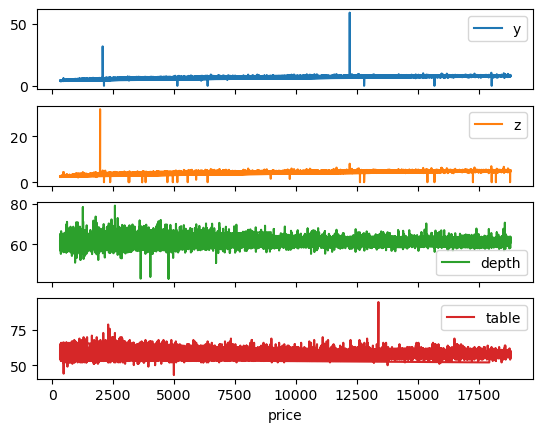

In [3]:
df.plot(x="price",y=["y","z","depth","table"],kind="line", subplots=True)

### Question 3)

Find and remove outliers by analyzing the above output of question 2. Explain your outlier detection process.

array([<AxesSubplot:xlabel='price'>, <AxesSubplot:xlabel='price'>,
       <AxesSubplot:xlabel='price'>, <AxesSubplot:xlabel='price'>],
      dtype=object)

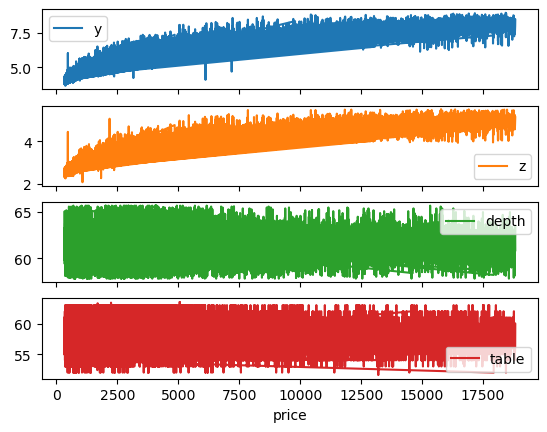

In [4]:
# solution code
from scipy import stats

removedOutliers = df[(np.abs(stats.zscore(df[["y","z","depth","table"]])) < 2.8).all(axis=1)]
removedOutliers.plot(x="price",y=["y","z","depth","table"],kind="line", subplots=True)
# I used the Z table for analyzing outliers; with  |z| < 2.8, only 0.51% of our data erased.
# I also plotted again to look changes and changes the z value

### Question 4)
Replace ordinal values (cut, color, clarity) according to rules below:
- For "cut": 'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5
- For "color": 'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7
- For "clarity": 'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8

In [5]:
# solution code
cutMap = {'Good':1, 'Very Good':2, 'Fair':3, 'Ideal':4, 'Premium':5}
colorMap = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarityMap = {'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8}

removedOutliers["cut"] = removedOutliers["cut"].replace(cutMap)
removedOutliers["color"] = removedOutliers["color"].replace(colorMap)
removedOutliers["clarity"] = removedOutliers["clarity"].replace(clarityMap)
df =  removedOutliers
df


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,6,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,5,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,1,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,1,7,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,7,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,7,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,7,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,3,3,61.0,58.0,2757,6.15,6.12,3.74


### Question 5)
Create bar graphs for 'cut', 'color', and 'clarity' attributes with their new values to analyze the dataset visually.


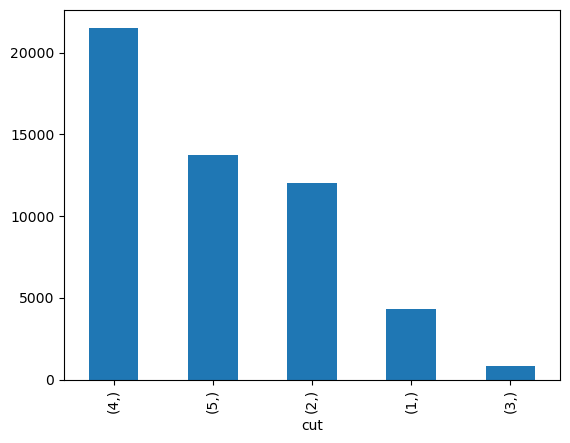

In [6]:
#df.plot(y=["cut","color","clarity"],kind="bar", subplots=True)
a = df[["cut"]].value_counts().plot(kind='bar')

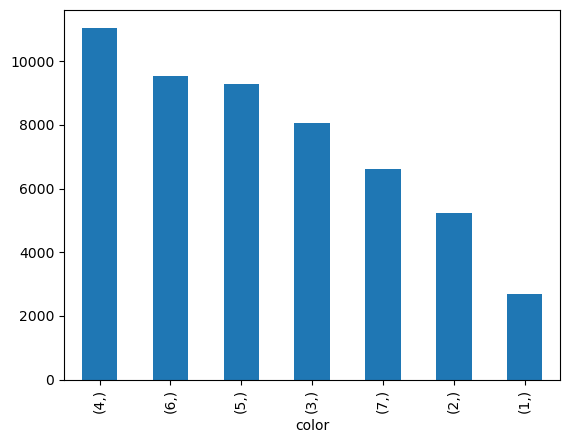

In [7]:
b = df[["color"]].value_counts().plot(kind='bar')

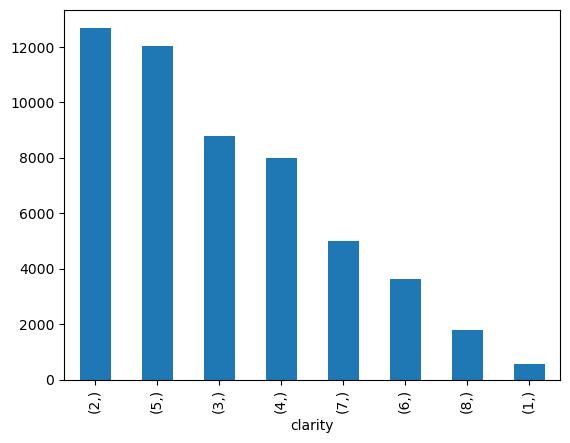

In [8]:
c = df[["clarity"]].value_counts().plot(kind='bar')

### Question 6)
Shuffle the data points and split the dataset into training and testing set, with a 0.7-0.3 ratio (training set will be %70, and test set will be %30 of the dataset) (Write your own shuffling and spliting code here, do not use predefined function train_test_split).



In [9]:
# solution code
shuffeled = df.sample(frac=1)
size = len(shuffeled.index)
trainsize = (int) (size * 0.7)
testsize = (int) (size * 0.3)
trainX =  shuffeled.head(trainsize)
testX =  shuffeled.tail(testsize)
trainY = trainX[["price"]]
trainX.pop("price")
testY = testX[["price"]]
testX.pop("price")

43454     1415
53256     2647
29467      702
52144     2469
47234     1841
         ...  
15287     6134
49050     2056
26277    15760
7839      4302
45553     1687
Name: price, Length: 15738, dtype: int64

### Question 7)

Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Then, make prediction and calculate mean squared error (MSE). Calculate MSE for k value between 1-30 and print them. Finally, create elbow function to find best k value and plot the elbow curve. Explain how you find the best k-value.

             MSE
K               
1   1.125558e+06
2   9.096767e+05
3   8.338277e+05
4   8.117675e+05
5   7.967540e+05
6   7.878667e+05
7   7.867324e+05
8   7.854549e+05
9   7.820775e+05
10  7.963424e+05
11  8.062249e+05
12  8.133820e+05
13  8.263790e+05
14  8.352467e+05
15  8.467713e+05
16  8.582938e+05
17  8.687747e+05
18  8.757884e+05
19  8.880591e+05
20  8.982542e+05
21  9.027159e+05
22  9.092372e+05
23  9.156880e+05
24  9.213068e+05
25  9.289423e+05
26  9.364066e+05
27  9.421067e+05
28  9.499678e+05
29  9.561258e+05
30  9.603587e+05


<AxesSubplot:xlabel='K'>

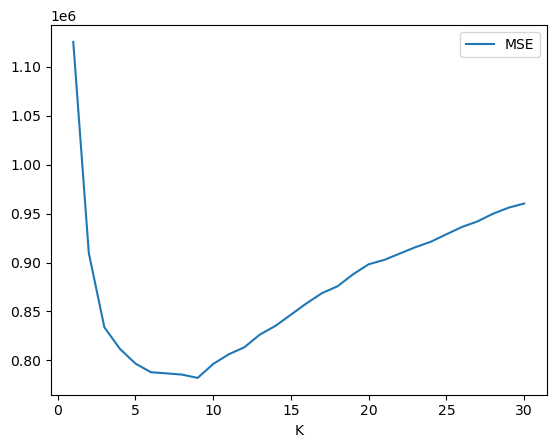

In [10]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
# solution code
kList = []
for k in range(1,31):
    regressor = KNN(n_neighbors=k) #k = 6 for minimum error
    regressor.fit(trainX,trainY)
    predict = regressor.predict(testX) #predicting y values to all x attributes
    predictY = pd.DataFrame(predict, columns= ['price'])
    kList.append([k,mse(testY, predictY)])
df = pd.DataFrame(kList, columns =['K', 'MSE'])
df = df.set_index("K")
print(df)
df.plot()


### Question 8)

Run 10-Fold Cross validation (CV) and print accuracy values for each run of CV. Also print the final average accuracy of the model.

In [11]:
# solution code
from sklearn.model_selection import cross_val_score
regressor = KNN(n_neighbors=6) #k = 6 for minimum error
regressor.fit(trainX,trainY)

a = cross_val_score(regressor, testX, testY, cv=10)
print(a)
print(sum(a) / len(a))

[0.93745291 0.92903923 0.94185594 0.94098348 0.93281453 0.93776712
 0.93611641 0.94046196 0.93691625 0.94467461]
0.9378082446283724


### Question 9)

Predict the price of new jewel data with the following custom features. 

features_array: [0.3,3.90,2.98,2.56,2,2,2]

In [12]:
# solution code
dfT = pd.DataFrame([0.3,2,2,2,62.4,55,3.9,2.98,2.56])
df = dfT.T
df


,0,1,2,3,4,5,6,7,8
0,0.3,2.0,2.0,2.0,62.4,55.0,3.9,2.98,2.56


In [13]:
predict = regressor.predict(df) #predicting y values to all x attributes
predictY = pd.DataFrame(predict, columns= ['price'])
predictY

,price
0,497.333333
